### Testing notebook for basic grid-visualization


In [ ]:
import os
path = os.getcwd()
path += "/Utils"
os.chdir(path)

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx

from Old_gridNetwork_util import generate_grid_network, initialize, UnrobustModel
from Old_gridNetwork_util import visualize_grid_network, visualize_grid_flow, visualize_grid_delta

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Number of nodes: 12
Number of edges: 34


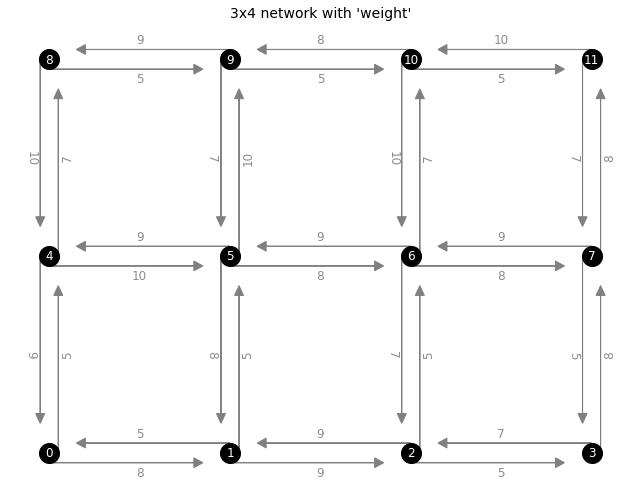

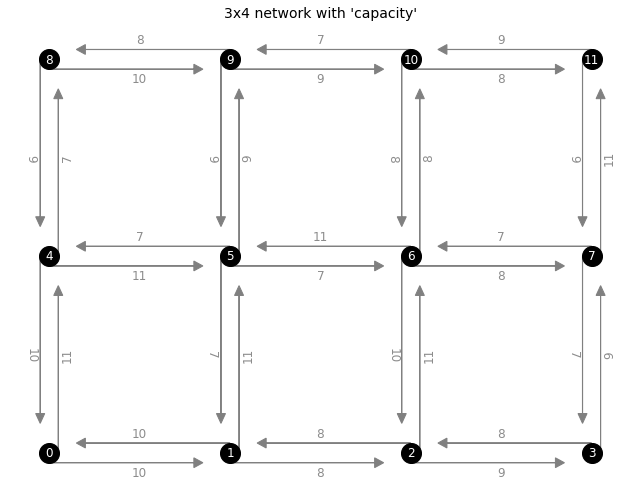

Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-15


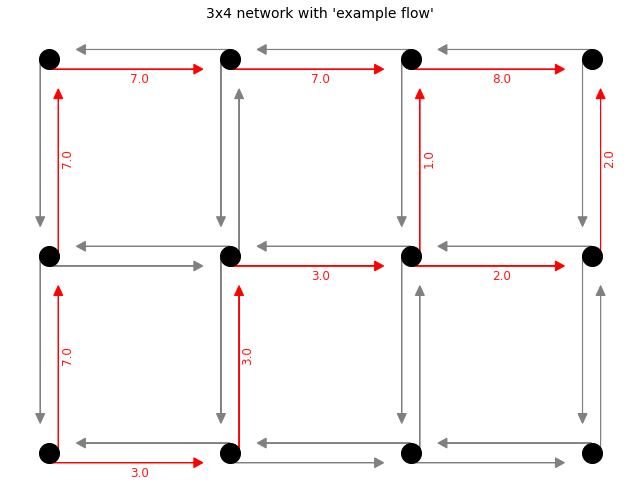

In [2]:
# Example usage
def example(mcol,nrow,d,flow=True):
    # Dimensions of the grid
    # d = total flow demand amount
    grid_digraph = generate_grid_network(mcol, nrow, d=d, 
                                         a=5, b=10, 
                                         capacity_min=int(d*0.7), capacity_max=int(1.1*d))

    G = grid_digraph.graph
    # Print graph details
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    # Inspect the first few edges
    # for u, v, data in list(grid_network.edges(data=True))[:5]:
    #     print(f"Edge ({u} -> {v}): weight={data['weight']}, capacity={data['capacity']}")

    visualize_grid_network(G, mcol, nrow, show_attribute='weight')  # Visualize with 'weights'
    visualize_grid_network(G, mcol, nrow, show_attribute='capacity')  # Visualize with 'capacity'
    f_unr, opm_unr = UnrobustModel(grid_digraph.W,d,grid_digraph.cap)
    if flow:
        '''warning: This will use Gurobi'''
        visualize_grid_flow(grid_digraph, f_unr, mcol, nrow, title='example flow')

'''Run this if do not want to use Gurobi'''
# example(4,3,d=10,flow=False) 
'''ortherwise'''
# example(4,3,d=10) 